In [1]:
#Montar drive
from google.colab import drive
drive.mount('/content/drive/')
%cd drive/My Drive/Redes Complexas/Projeto Final
!ls

Mounted at /content/drive/
/content/drive/My Drive/Redes Complexas/Projeto Final
 all-stop.txt				     metrics2.txt
 assort.pdf				     metrics3.txt
 between.pdf				     metrics.txt
 Classificadores.ipynb			     nodes.pdf
 corr2.pdf				     norma.pdf
 corr.png				     no-stop.txt
 degree.pdf				     pairplot.pdf
 dense.pdf				     pairplot.PNG
 density.pdf				     ponctuated.txt
 edges.pdf				     Resultados.xlsx
'gbj-gsbr-jkv (2021-01-13 at 16:56 GMT-8)'


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
dados = pd.read_csv('ponctuated.txt', sep=';', index_col=0)
dados.head()

,author,title,date,filename,century,words,number_of_nodes,normalized_number_of_nodes,density,assortativity_coefficient,average_shortest_path_length,diameter,transitivity,mean_degree,mean_clustering,max_clustering,mean_betweenness_centrality,max_betweenness_centrality
0,José de Anchieta,Feitos de Mem de Sá,1560,anchieta1560.txt,16th Century,27163,3457,0.127269,0.001176,-0.043127,4.415320,12,0.038778,8.129014,NaN,NaN,11399.630352,7.496003e+05
1,José de Anchieta,Auto de Sao Lourenco,1586,anchieta1586.txt,16th Century,6896,1363,0.197651,0.001854,-0.104866,4.632919,14,0.038615,5.050624,NaN,NaN,4289.802177,3.480018e+05
2,Joao de Barros,Gramática,1540,barros1540.txt,16th Century,51060,4494,0.088014,0.001094,-0.118605,3.903045,12,0.061747,9.834891,NaN,NaN,13050.769490,2.560535e+06
3,Pero Vaz de Caminha,Carta a Manuel I,1550,caminha1500.txt,16th Century,7915,901,0.113834,0.004198,-0.034167,4.147334,14,0.100097,7.556049,NaN,NaN,2711.533568,7.210176e+04
4,Luis de Camoes,Os Lusíadas,1572,camoes1572.txt,16th Century,55474,3879,0.069925,0.001758,-0.124927,3.611083,12,0.079785,13.637535,NaN,NaN,10088.677672,1.009583e+06


### Análise de métricas ao longo do tempo

In [4]:
dados = dados.replace({'16th Century': 16, '17th Century': 17, '18th Century':18, '19th Century':19, '20th Century':20})
X = dados.iloc[:,5:]
y = dados.iloc[:,4]
y.value_counts()

19    36
17    18
18    14
20    13
16    12
Name: century, dtype: int64

No handles with labels found to put in legend.


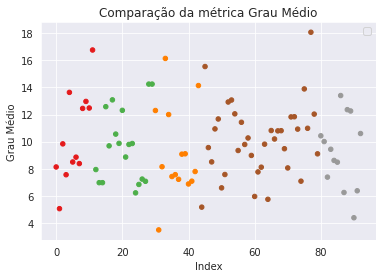

In [5]:
metrica = 'Grau Médio'

plt.figure()
plt.scatter(range(len(dados.mean_degree)), dados.mean_degree, c=y, s=20, cmap='Set1')
plt.xlabel('Index')
plt.ylabel(metrica)
plt.title('Comparação da métrica ' + metrica)
plt.legend()
plt.savefig('degree.pdf')

<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


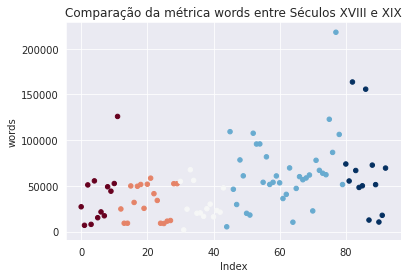

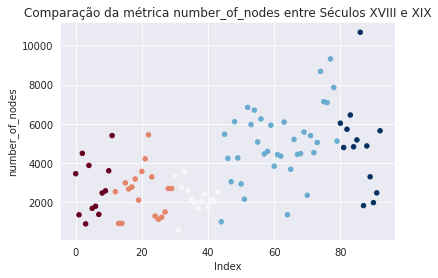

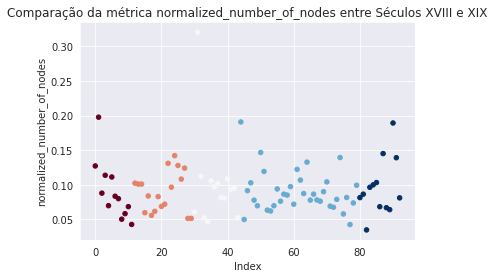

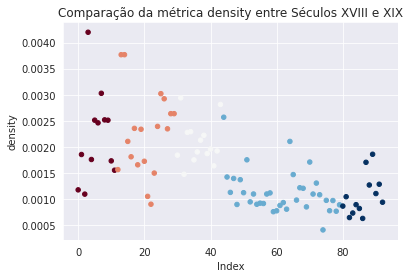

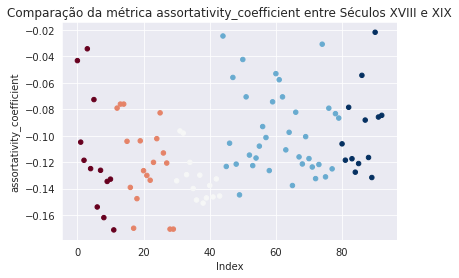

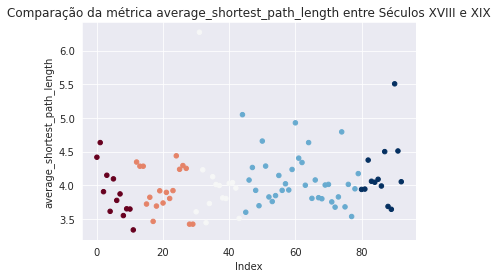

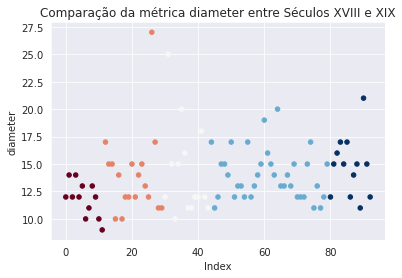

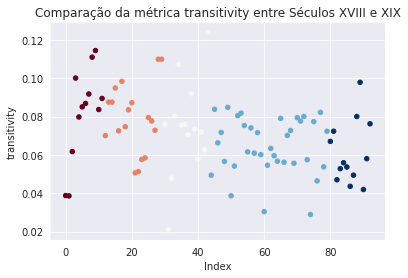

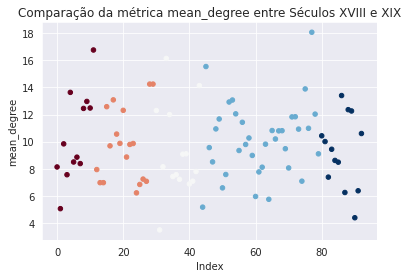

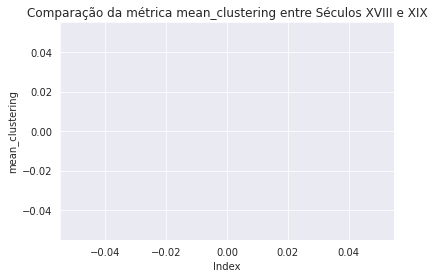

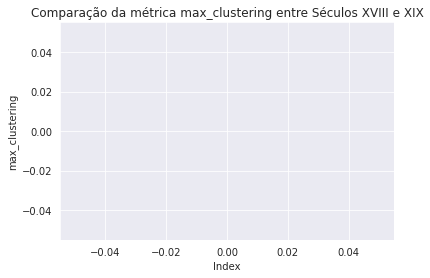

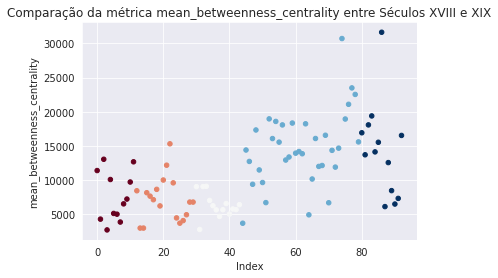

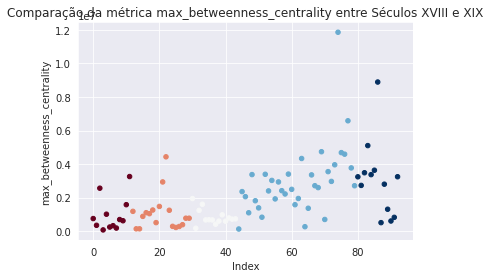

In [ ]:
for metrica in range(len(X.columns)):
    plt.figure()
    plt.scatter(range(len(np.array(X.iloc[:, metrica]))), np.array(X.iloc[:, metrica]), c=y, s=20, cmap='RdBu')
    plt.xlabel('Index')
    plt.ylabel(str(X.columns[metrica]))
    plt.title('Comparação da métrica ' + str(X.columns[metrica]) +' entre Séculos XVIII e XIX')

In [ ]:
#teste de hipóteses

s19 = dados[dados.century == '19th Century'].index
s20 = dados[dados.century == '20th Century'].index
dados_19 = dados.iloc[s19,:]
np.mean(dados.iloc[s19,6])
np.mean(dados.iloc[s20,6])
np.std(dados.iloc[s20,6])
(4905.15- 5026.58)/(2228.10/np.sqrt(13))

-0.1965001980968508

In [ ]:
#pegar somente séculos XVIII e XIX

s19 = dados[dados.century == '19th Century'].index
s18 = dados[dados.century == '18th Century'].index
sec = s19.append(s18)
dados = dados.iloc[sec,:]

In [ ]:
len(s20)

13

In [ ]:
#dados 

X = dados.iloc[:,5:]
y = dados.iloc[:,4]
y = 1*(y == '19th Century') # deixar y binário -> séc XIX=1
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = dados['century'])
y.value_counts()

19th Century    36
17th Century    18
18th Century    14
20th Century    13
16th Century    12
Name: century, dtype: int64

In [ ]:
sns.pairplot(dados, hue = 'century', palette='rocket')
plt.savefig('pairplot.pdf')

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'Conjunto de dados')

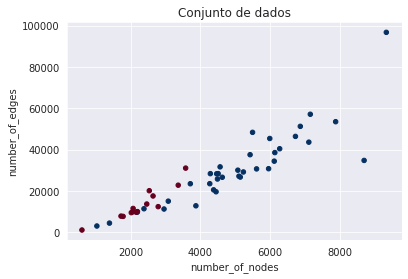

In [ ]:
#zoom do gráfico acima

plt.figure()
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=y, s=20, cmap='RdBu')
plt.xlabel(str(X.columns[1]))
plt.ylabel(str(X.columns[2]))
plt.title('Dados com stopwords')

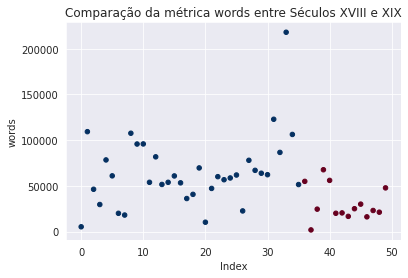

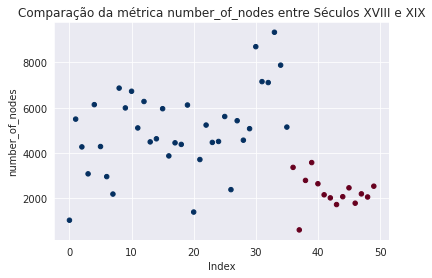

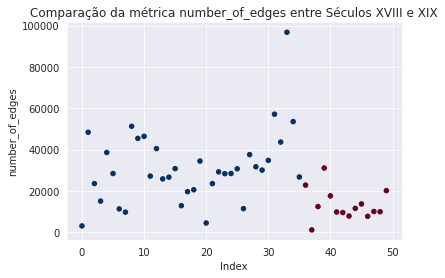

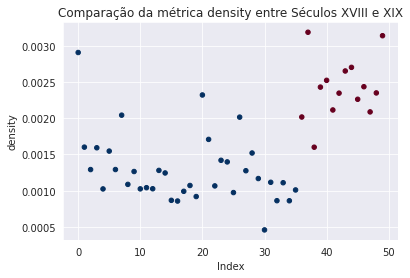

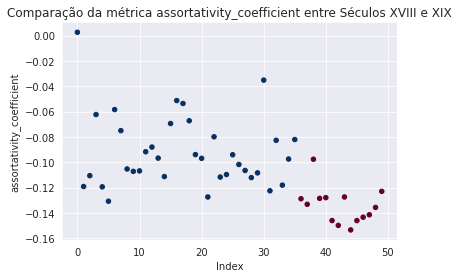

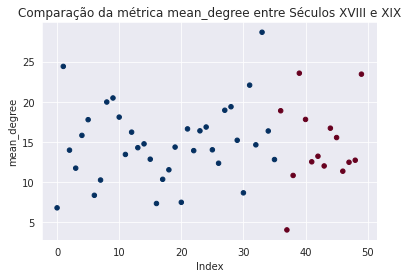

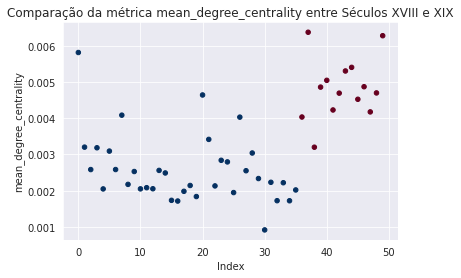

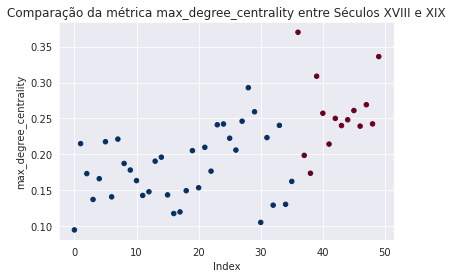

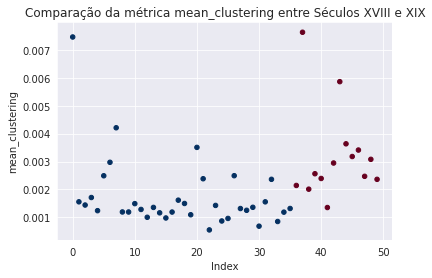

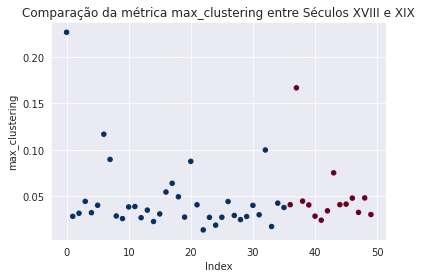

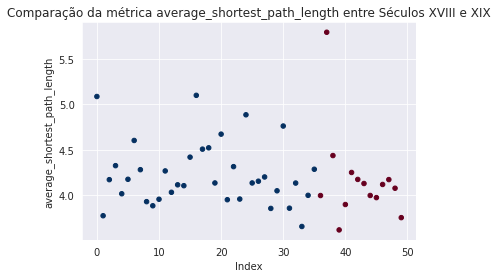

In [ ]:
#plot do número de palavras de cada livro de cada século
#Existe alguma distinção em assortatividade e número de vértices

for metrica in range(len(X.columns)):
    plt.figure()
    plt.scatter(range(len(np.array(X.iloc[:, metrica]))), np.array(X.iloc[:, metrica]), c=y, s=20, cmap='RdBu')
    plt.xlabel('Index')
    plt.ylabel(str(X.columns[metrica]))
    plt.title('Comparação da métrica ' + str(X.columns[metrica]) +' entre Séculos XVIII e XIX')

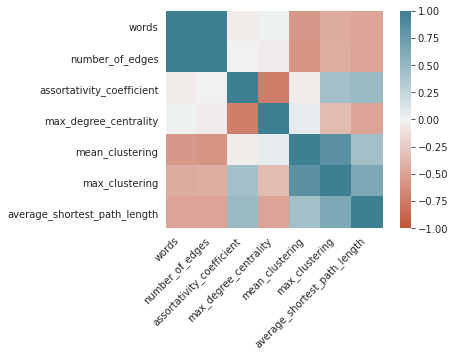

In [ ]:
#Bastante colinearidade entre as variáveis explanatórias -> poucas devem ser relevantes

corr = dados.iloc[:,:].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Regressão Logística

In [ ]:
logreg_clf = LogisticRegression().fit(x_train,y_train)

In [ ]:
y_train_pred = logreg_clf.predict(x_train)
y_test_pred = logreg_clf.predict(x_test)

alvo = 0
# avg = 'binary'
avg = 'weighted'

print('Precisão de treinamento: '+ str(metrics.precision_score(y_train, y_train_pred, pos_label = alvo, average=avg)))
print('Precisão de teste: '+ str(metrics.precision_score(y_test, y_test_pred, pos_label = alvo, average=avg)))

print('Sensibilidade de treinamento: '+ str(metrics.recall_score(y_train, y_train_pred, pos_label = alvo, average=avg)))
print('Sensibilidade de teste: '+ str(metrics.recall_score(y_test, y_test_pred, pos_label = alvo, average=avg)))


Precisão de treinamento: 0.7960474308300395
Precisão de teste: 0.7647058823529411
Sensibilidade de treinamento: 0.7878787878787878
Sensibilidade de teste: 0.7647058823529411


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Text(0.5, 0, ' Fração de Falsos Positivos')

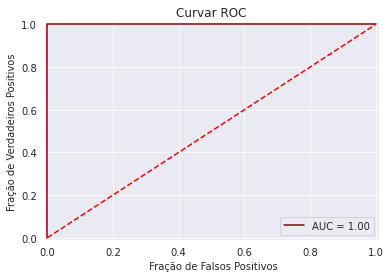

In [ ]:
#curva ROC

y_test_pred_proba = logreg_clf.predict_proba(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred_proba[:,1])
auc = metrics.roc_auc_score(y_test, y_test_pred_proba[:,1]) #auc = area under curve

plt.plot(fpr, tpr, 'darkred', label = 'AUC = %0.2f' % auc)
plt.title('Curvar ROC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #pior classificador possível
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('Fração de Verdadeiros Positivos') #igual ao recall
plt.xlabel(' Fração de Falsos Positivos') # FP/TN+FP

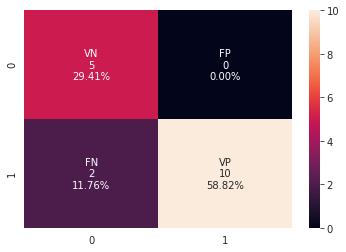

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test,y_test_pred)

group_names = ['VN','FP','FN','VP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)                    
sns.heatmap(cf_matrix, annot=labels, fmt='')

In [ ]:
#features mais relevantes

selector = RFE(logreg_clf, 3)
selector = selector.fit(x_train, y_train)
order = selector.ranking_
order

array([8, 4, 7, 9, 1, 2, 6, 1, 5, 3, 1])

In [ ]:
ranks = []
for i in order:
    ranks.append(f"{i}.{X.columns[i]}")
ranks

['8.mean_clustering',
 '4.assortativity_coefficient',
 '7.max_degree_centrality',
 '9.max_clustering',
 '1.number_of_nodes',
 '2.number_of_edges',
 '6.mean_degree_centrality',
 '1.number_of_nodes',
 '5.mean_degree',
 '3.density',
 '1.number_of_nodes']

In [ ]:
ranks = []
for i in order:
    ranks.append(X.columns[i])

drop = ranks[6:]

dados = dados.drop(columns = drop, axis =1)
dados.columns

Index(['author', 'title', 'date', 'filename', 'century', 'words',
       'number_of_edges', 'assortativity_coefficient', 'max_degree_centrality',
       'mean_clustering', 'max_clustering', 'average_shortest_path_length'],
      dtype='object')

## KNN

In [ ]:
#Aplicar KNN com validação cruzada

knn = KNeighborsClassifier()

# testar vários valores diferentes para k
param_grid = {'n_neighbors': np.arange(1, 25)}

#usar o grid search para testar o modelo com todos os valores de k - validação cruzada com 5 divisões
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

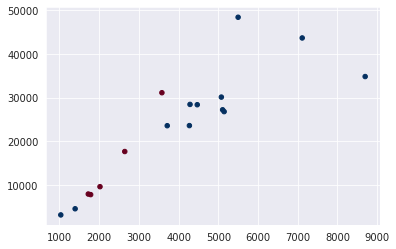

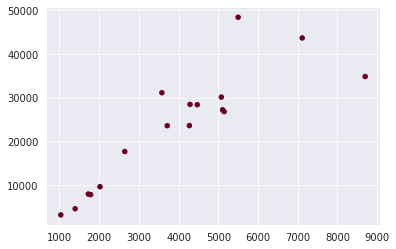

In [ ]:
y_test_pred = knn.predict(x_test)

plt.figure()
plt.scatter(x_test.iloc[:, 1], x_test.iloc[:, 2], c=y_test, s=20, cmap='RdBu')
plt.figure()
plt.scatter(x_test.iloc[:, 1], x_test.iloc[:, 2], c=y_test_pred, s=20, cmap='RdBu')

In [ ]:
#métricas de classificação

y_train_pred = knn.predict(x_train)


alvo = 1
# avg = 'binary'
avg = 'weighted'

print('Precisão de treinamento: '+ str(metrics.precision_score(y_train, y_train_pred, pos_label = alvo, average=avg)))
print('Precisão de teste: '+ str(metrics.precision_score(y_test, y_test_pred, pos_label = alvo, average=avg)))

print('Sensibilidade de treinamento: '+ str(metrics.recall_score(y_train, y_train_pred, pos_label = alvo, average=avg)))
print('Sensibilidade de teste: '+ str(metrics.recall_score(y_test, y_test_pred, pos_label = alvo, average=avg)))

Precisão de treinamento: 0.5289256198347108
Precisão de teste: 0.49826989619377166
Sensibilidade de treinamento: 0.7272727272727273
Sensibilidade de teste: 0.7058823529411765


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 0, ' Fração de Falsos Positivos')

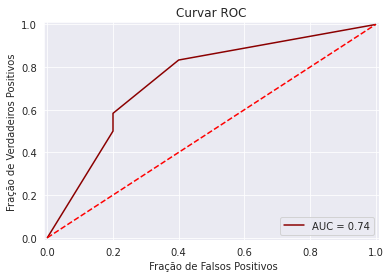

In [ ]:
#Podemos visualizar o balanço entre essas suas métricas com a curva ROC

y_test_pred_proba = knn.predict_proba(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred_proba[:,1])
auc = metrics.roc_auc_score(y_test, y_test_pred_proba[:,1]) #auc = area under curve

plt.plot(fpr, tpr, 'darkred', label = 'AUC = %0.2f' % auc)
plt.title('Curvar ROC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #pior classificador possível
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('Fração de Verdadeiros Positivos') #igual ao recall
plt.xlabel(' Fração de Falsos Positivos') # FP/TN+FP

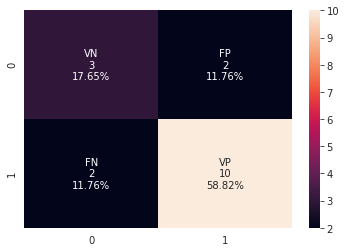

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test,y_test_pred)

group_names = ['VN','FP','FN','VP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)                    
sns.heatmap(cf_matrix, annot=labels, fmt='')

## Dados sem stopwords

In [ ]:
drop = ['mean_betweenness_centrality',
 'max_betweenness_centrality','normalized_number_of_edges','diameter',
 'transitivity']

dados = dados.drop(columns=drop, axis=1)
dados.columns

Index(['author', 'title', 'date', 'filename', 'century', 'words',
       'number_of_nodes', 'normalized_number_of_nodes', 'number_of_edges',
       'density', 'assortativity_coefficient', 'average_shortest_path_length',
       'mean_degree', 'mean_clustering', 'max_clustering'],
      dtype='object')

In [ ]:
dados = pd.read_csv('no-stop.txt', sep=';', index_col=0)
dados.head()

,author,title,date,filename,century,words,number_of_nodes,normalized_number_of_nodes,number_of_edges,normalized_number_of_edges,density,assortativity_coefficient,average_shortest_path_length,diameter,transitivity,mean_degree,mean_clustering,max_clustering,mean_betweenness_centrality,max_betweenness_centrality
0,José de Anchieta,Feitos de Mem de Sá,1560 – 1562,anchieta1560.txt,16th Century,27163,3475,0.127931,15605,0.000042,0.001293,-0.052467,4.404699,11,0.025985,9.839424,0.002040,0.077987,0.000939,0.099145
1,José de Anchieta,Auto de Sao Lourenco,1586,anchieta1586.txt,16th Century,6896,1384,0.200696,4213,0.000177,0.002201,-0.116429,4.575623,12,0.029323,6.651734,0.004836,0.109913,0.002449,0.243151
2,Joao de Barros,Gramática,1540,barros1540.txt,16th Century,51060,4497,0.088073,24630,0.000019,0.001218,-0.118974,4.056941,12,0.053103,13.340004,0.002042,0.046002,0.000627,0.162564
3,Pero Vaz de Caminha,Carta a Manuel I,1500,caminha1500.txt,16th Century,7915,894,0.112950,3996,0.000128,0.005005,-0.025223,4.243115,13,0.085259,10.908277,0.009778,0.192666,0.003299,0.104318
4,Luis de Camoes,Os Lusíadas,1572,camoes1572.txt,16th Century,55474,3893,0.070177,28862,0.000019,0.001905,-0.124618,3.716993,12,0.067917,17.682507,0.004429,0.075995,0.000655,0.105154


In [ ]:
#pegar somente séculos XVIII e XIX

s19 = dados[dados.century == '19th Century'].index
s18 = dados[dados.century == '18th Century'].index
sec = s19.append(s18)
dados = dados.iloc[sec,:]

In [ ]:
#dados 

X = dados.iloc[:,5:]
y = dados.iloc[:,4]
y = 1*(y == '19th Century') # deixar y binário -> séc XIX=1
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = dados['century'])
y.value_counts()

1    36
0    14
Name: century, dtype: int64

In [ ]:
dados_aux = dados.drop(columns = ['author',	'title',	'date',	'filename',	'words',	'number_of_nodes',	'normalized_number_of_nodes',	'number_of_edges',	'normalized_number_of_edges'], axis=1)

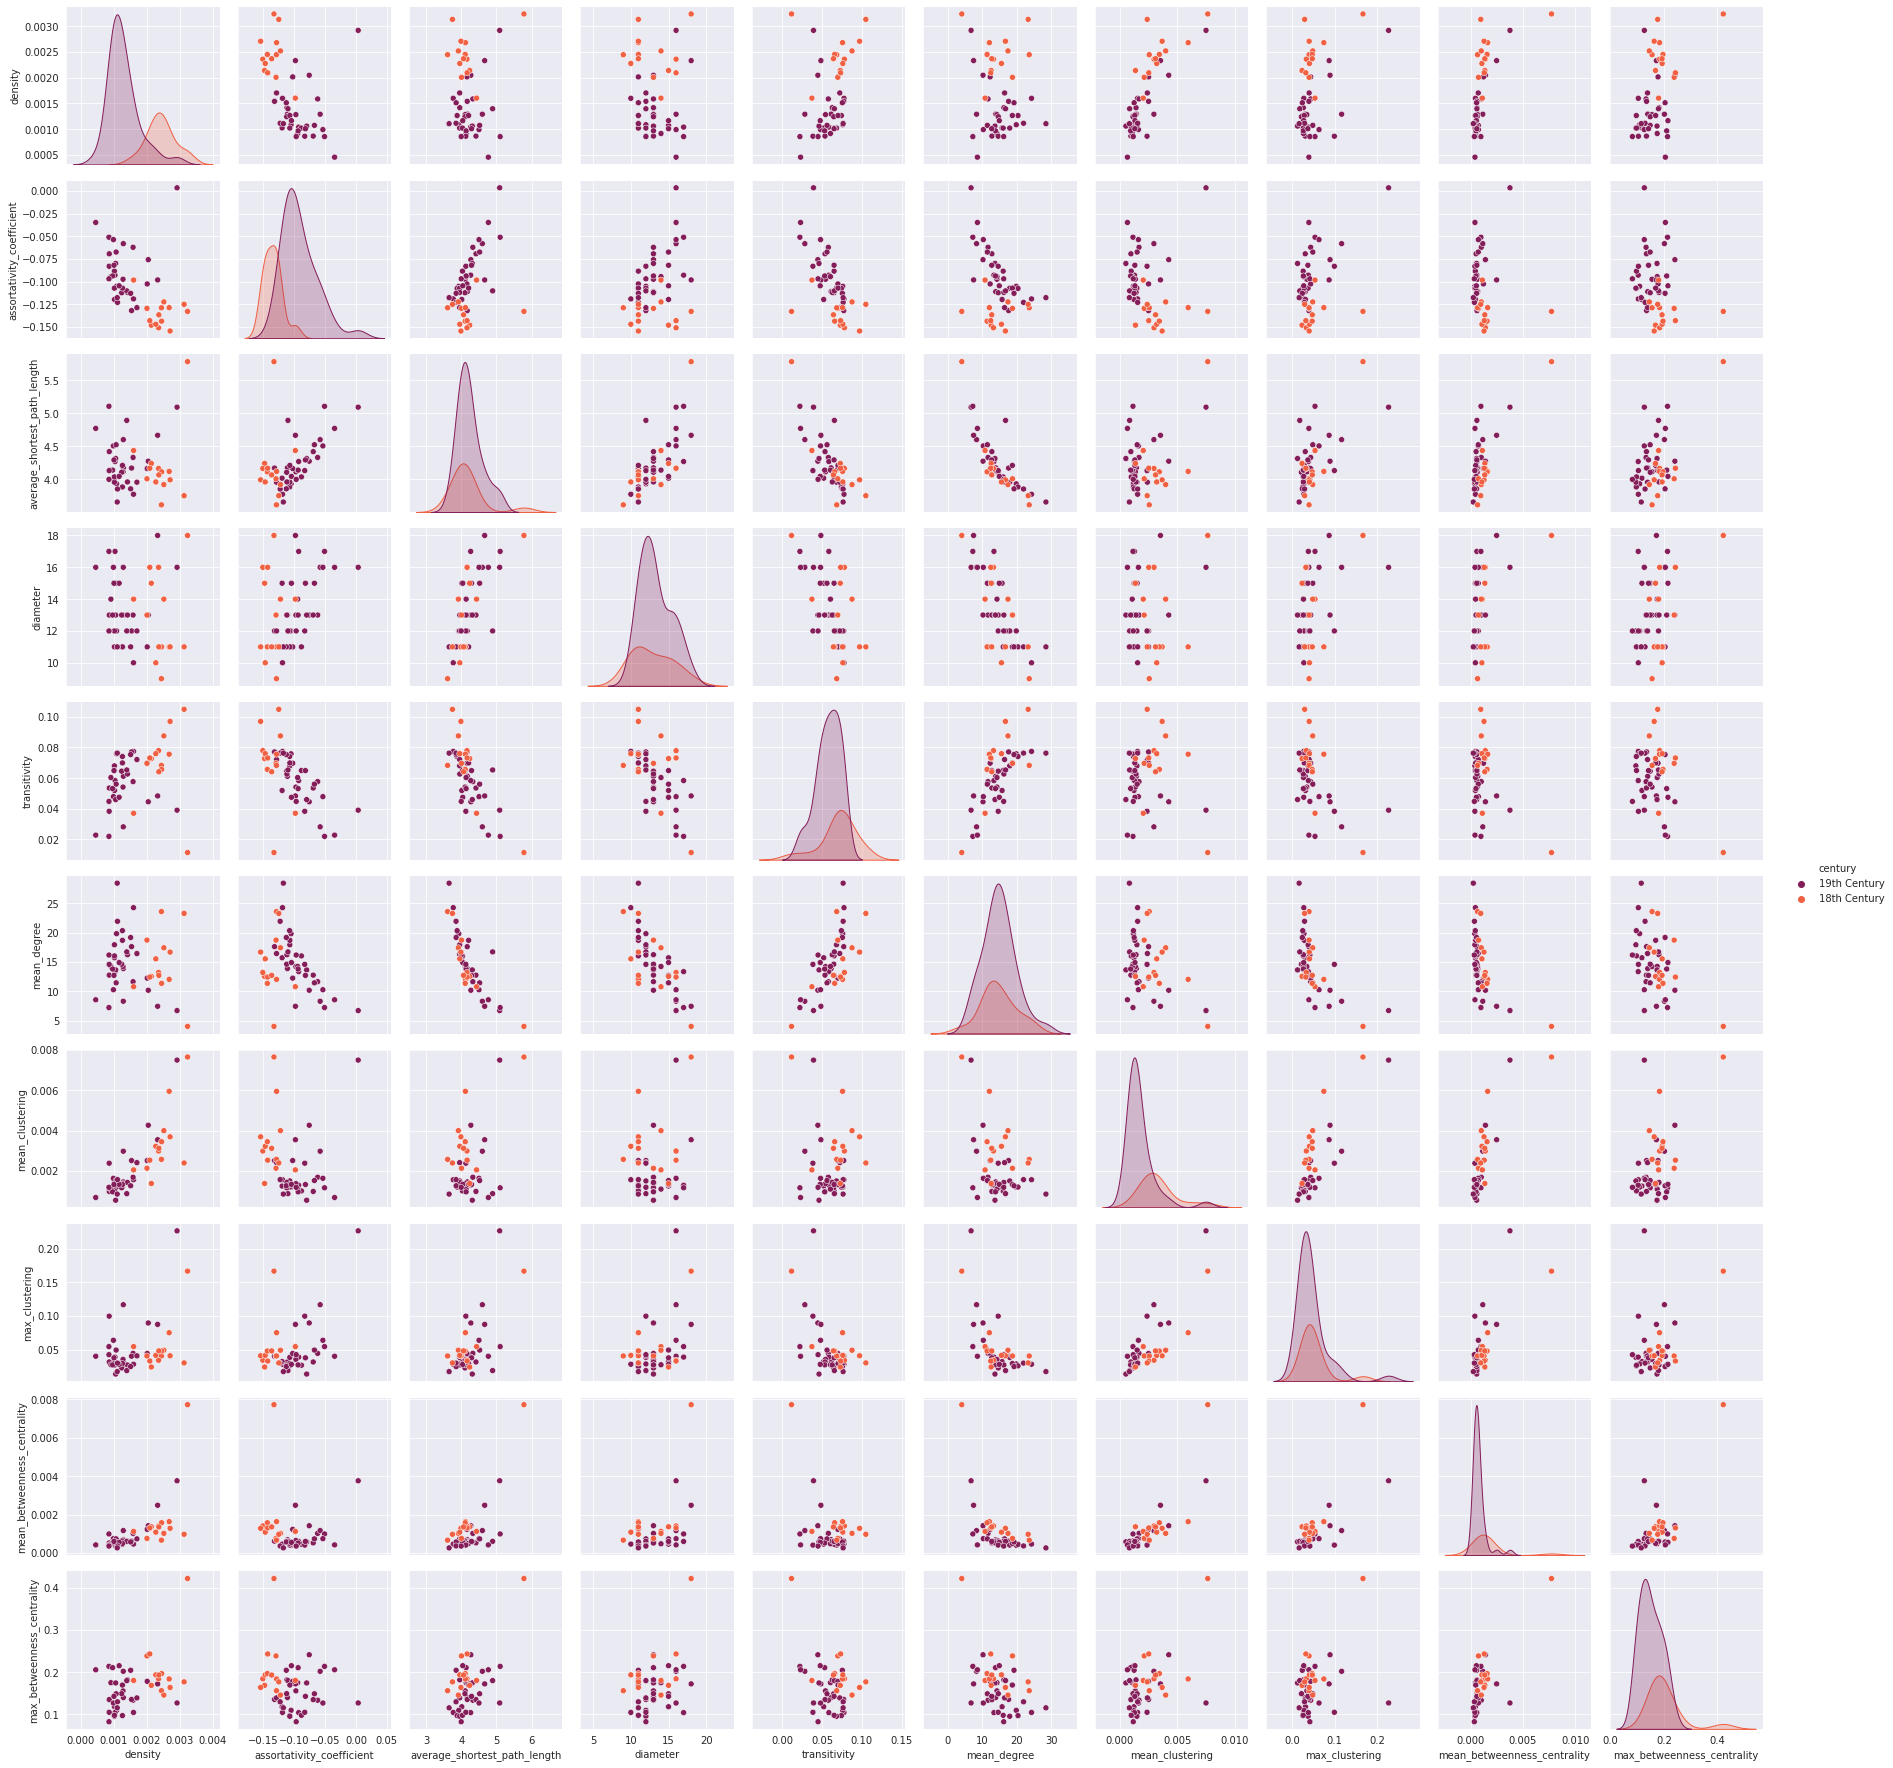

In [ ]:
sns.pairplot(dados_aux, hue = 'century', palette='rocket')
plt.savefig('pairplot.pdf')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


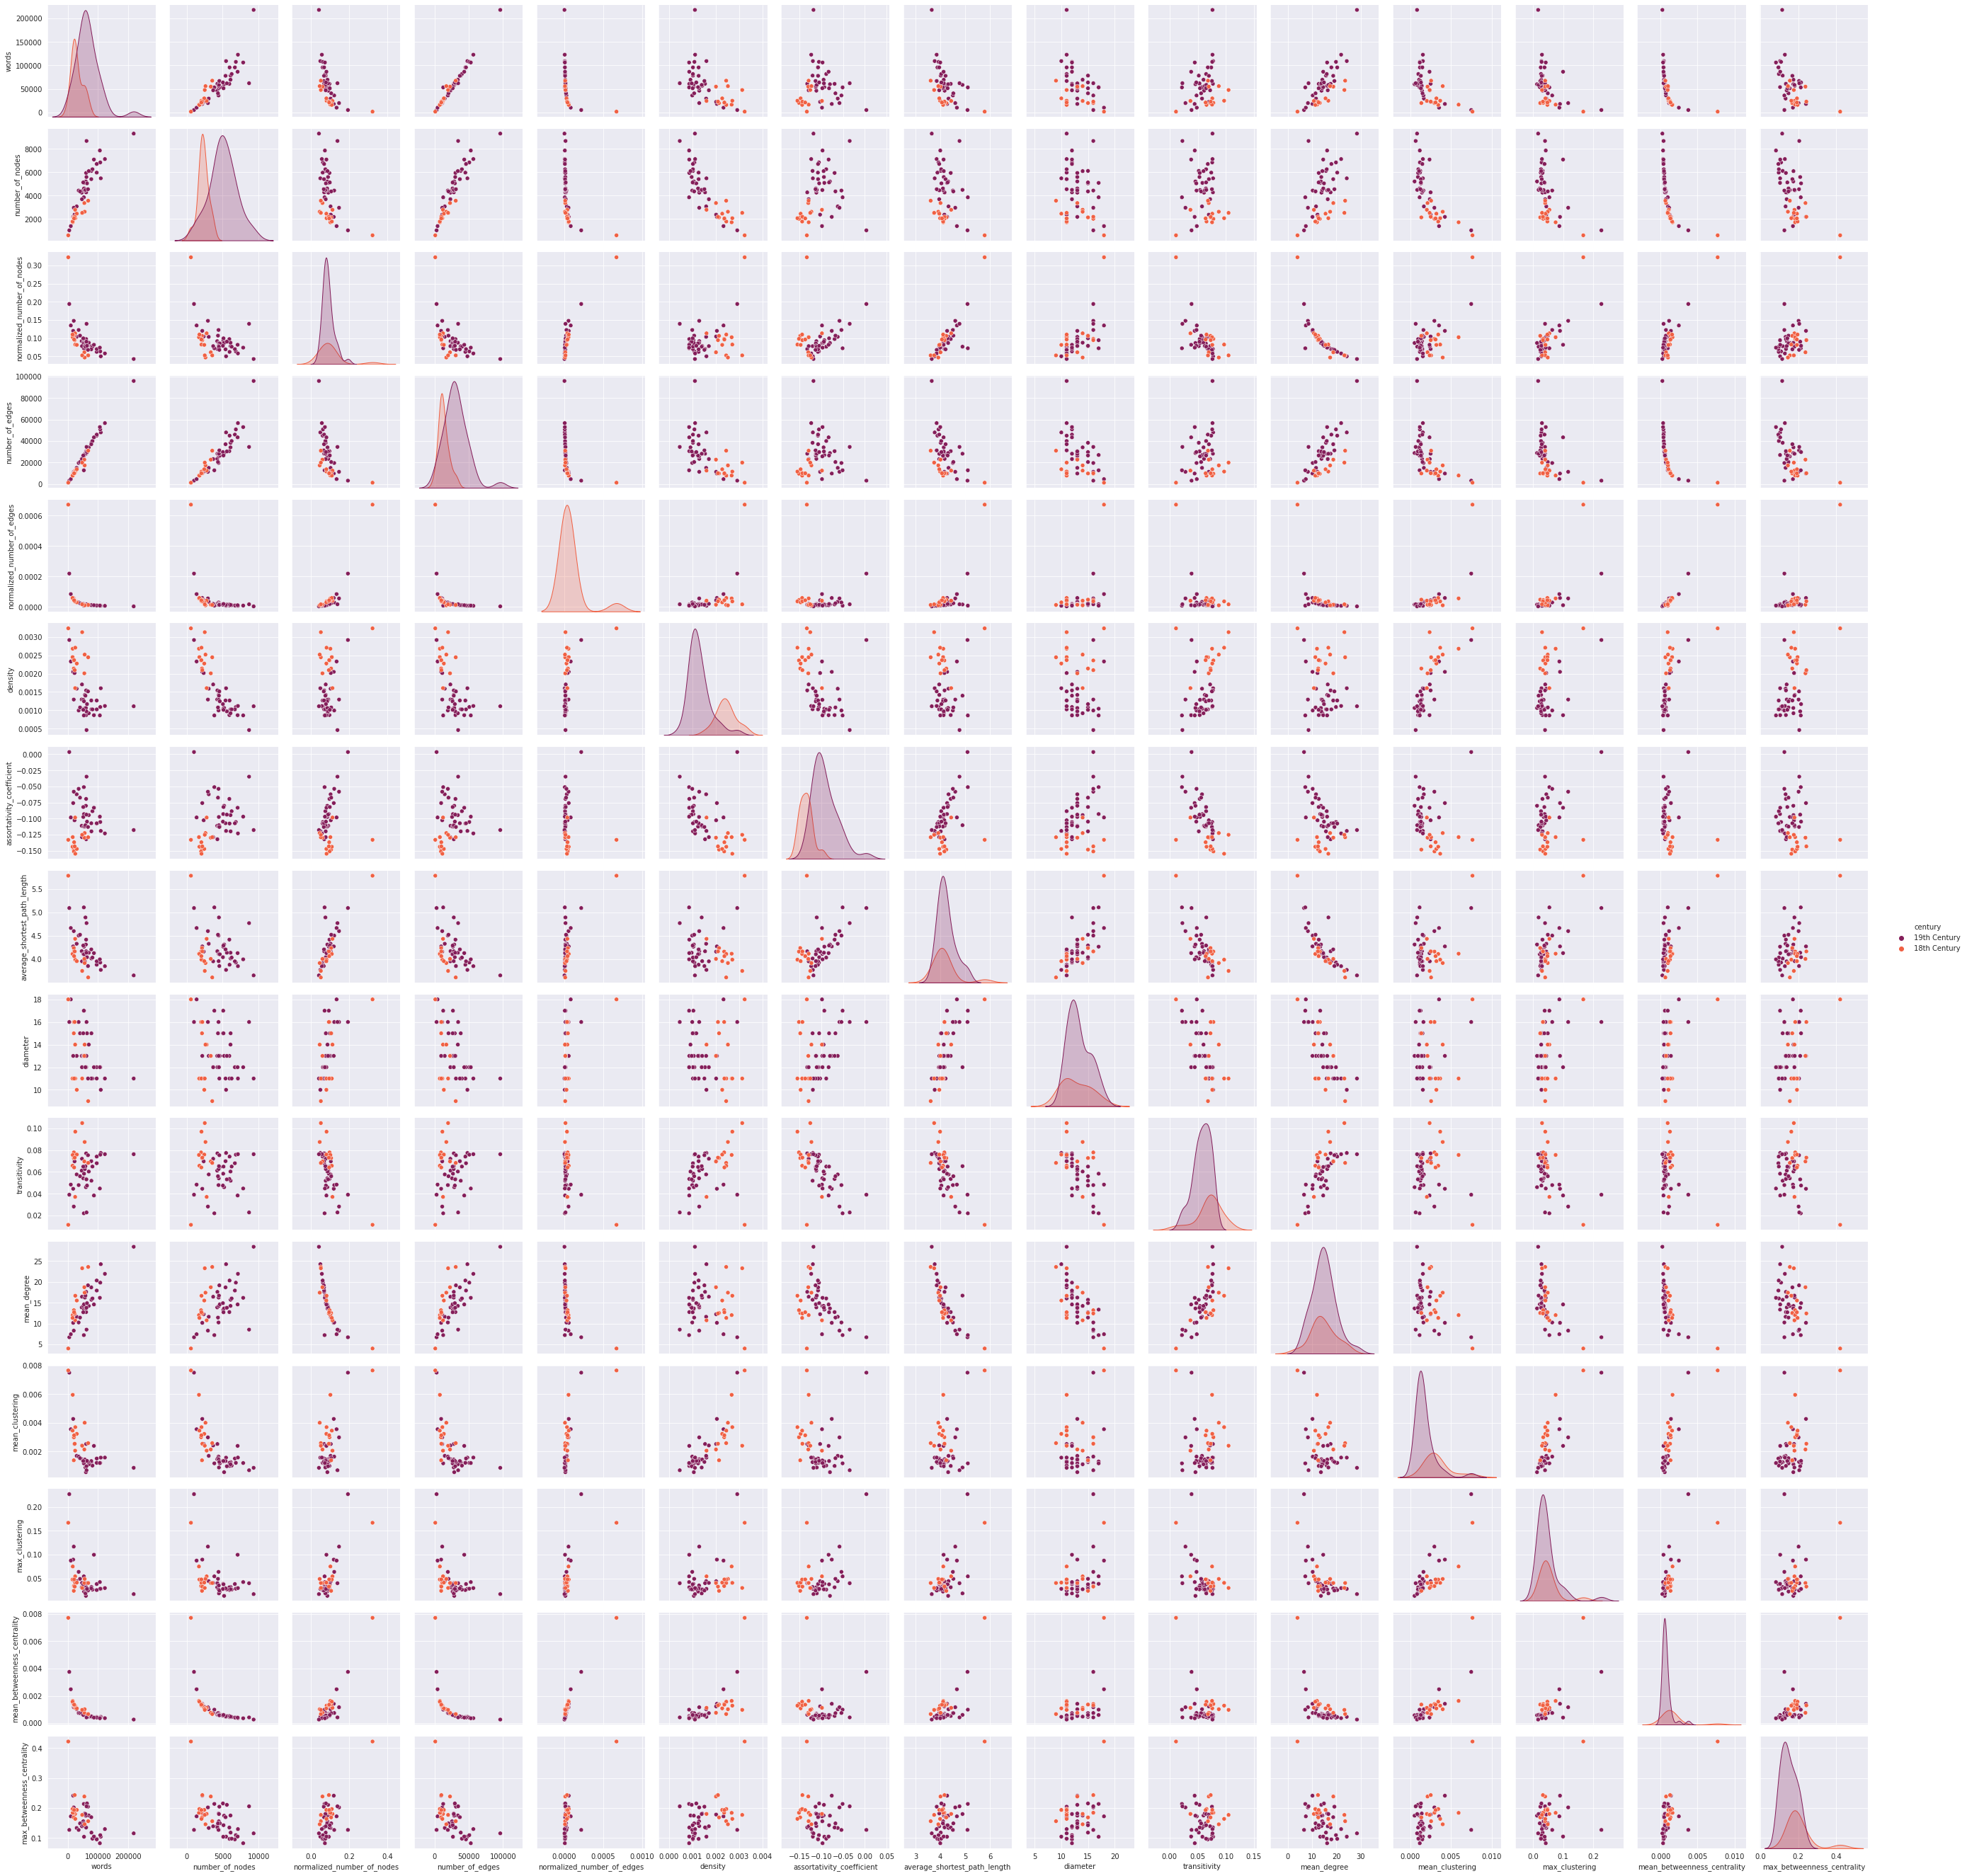

In [ ]:
sns.pairplot(dados, hue = 'century', palette='rocket')

Text(0.5, 1.0, 'Conjunto de dados')

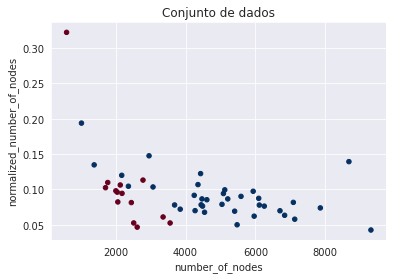

In [ ]:
#zoom do gráfico acima

plt.figure()
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=y, s=20, cmap='RdBu')
plt.xlabel(str(X.columns[1]))
plt.ylabel(str(X.columns[2]))
plt.title('Conjunto de dados')

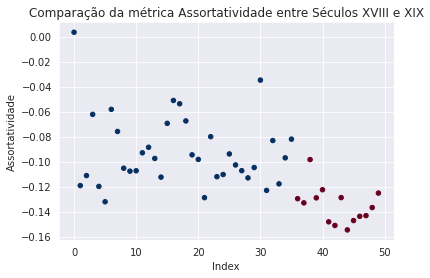

In [ ]:
#plot do número de palavras de cada livro de cada século
#Existe alguma distinção em assortatividade e número de vértices
metrica = 'Assortatividade'

plt.figure()
plt.scatter(range(len(np.array(dados.assortativity_coefficient))), np.array(dados.assortativity_coefficient), c=y, s=20, cmap='RdBu')
plt.xlabel('Index')
plt.ylabel(metrica)
plt.title('Comparação da métrica ' + metrica + ' entre Séculos XVIII e XIX')
plt.savefig('assort.pdf')

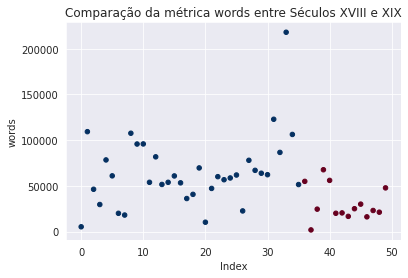

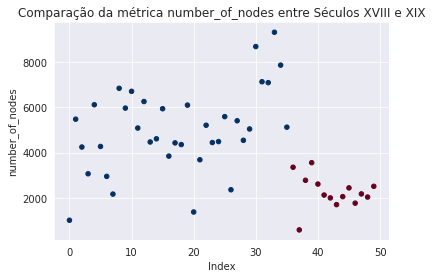

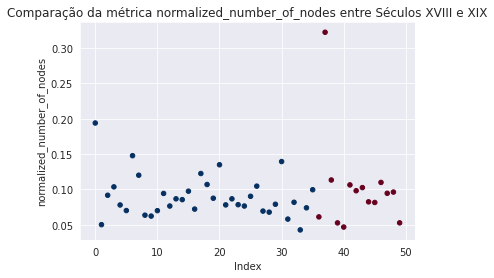

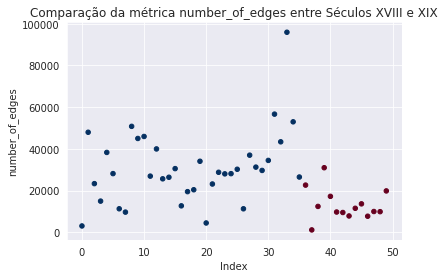

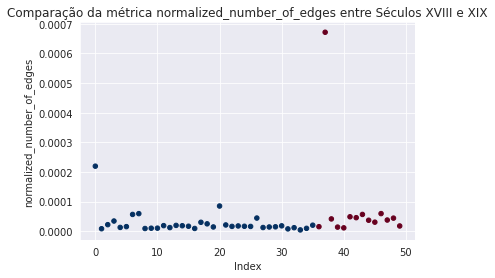

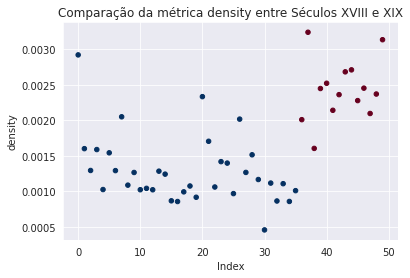

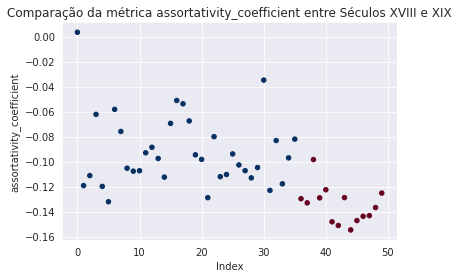

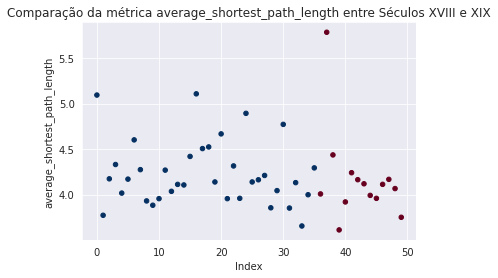

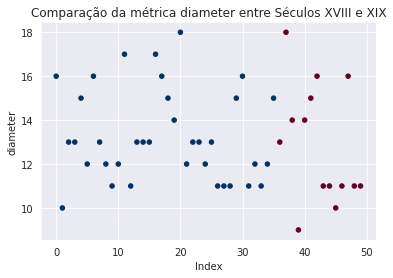

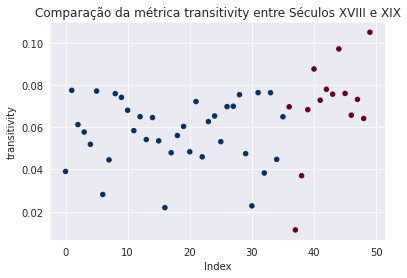

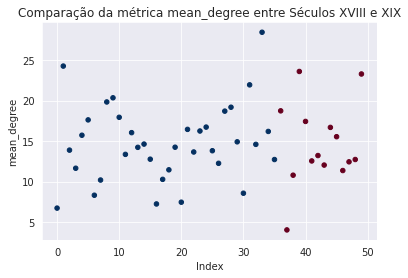

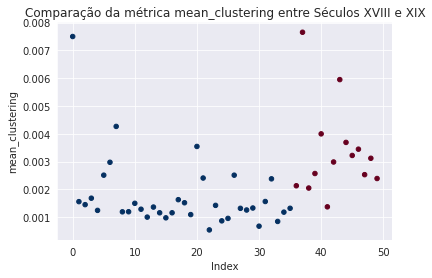

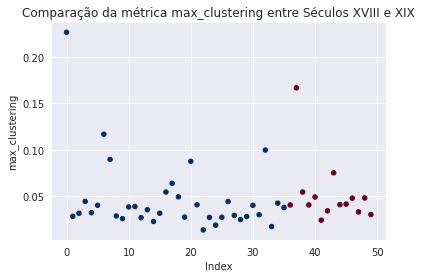

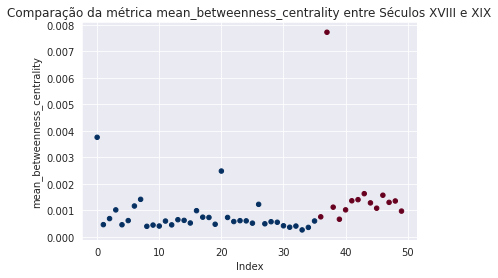

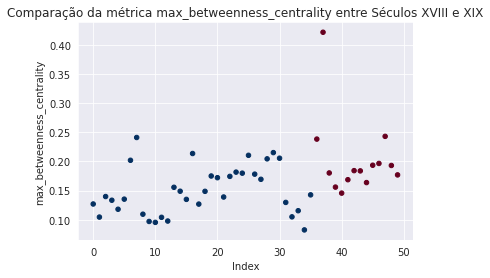

In [ ]:
#plot do número de palavras de cada livro de cada século
#Existe alguma distinção em assortatividade e número de vértices

for metrica in range(len(X.columns)):
    plt.figure()
    plt.scatter(range(len(np.array(X.iloc[:, metrica]))), np.array(X.iloc[:, metrica]), c=y, s=20, cmap='RdBu')
    plt.xlabel('Index')
    plt.ylabel(str(X.columns[metrica]))
    plt.title('Comparação da métrica ' + str(X.columns[metrica]) +' entre Séculos XVIII e XIX')

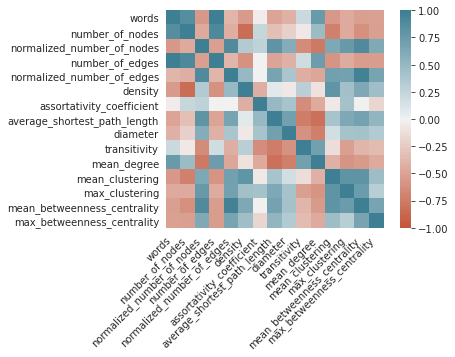

In [ ]:
#Bastante colinearidade entre as variáveis explanatórias -> poucas devem ser relevantes

corr = dados.iloc[:,:].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig('corr.png')

## Regressão Logística

In [ ]:
logreg_clf = LogisticRegression().fit(x_train,y_train)

In [ ]:
y_train_pred = logreg_clf.predict(x_train)
y_test_pred = logreg_clf.predict(x_test)

alvo = 1
avg = 'binary'
avg = 'weighted'

print('Precisão de treinamento: '+ str(metrics.precision_score(y_train, y_train_pred, pos_label = alvo, average=avg)))
print('Precisão de teste: '+ str(metrics.precision_score(y_test, y_test_pred, pos_label = alvo, average=avg)))

print('Sensibilidade de treinamento: '+ str(metrics.recall_score(y_train, y_train_pred, pos_label = alvo, average=avg)))
print('Sensibilidade de teste: '+ str(metrics.recall_score(y_test, y_test_pred, pos_label = alvo, average=avg)))


AttributeError: ignored

In [ ]:
#curva ROC

y_test_pred_proba = logreg_clf.predict_proba(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred_proba[:,1])
auc = metrics.roc_auc_score(y_test, y_test_pred_proba[:,1]) #auc = area under curve

plt.plot(fpr, tpr, 'darkred', label = 'AUC = %0.2f' % auc)
plt.title('Curvar ROC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #pior classificador possível
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('Fração de Verdadeiros Positivos') #igual ao recall
plt.xlabel(' Fração de Falsos Positivos') # FP/TN+FP

AttributeError: ignored

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test,y_test_pred)

group_names = ['VN','FP','FN','VP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)                    
sns.heatmap(cf_matrix, annot=labels, fmt='')

In [ ]:
#features mais relevantes

selector = RFE(logreg_clf, 3)
selector = selector.fit(x_train, y_train)
order = selector.ranking_
order

array([ 8,  7,  1, 10, 13, 11,  1,  2,  6,  4,  5,  9,  3, 12,  1])

In [ ]:
ranks = []
for i in order:
    ranks.append(f"{i}.{X.columns[i]}")
ranks

['8.diameter',
 '7.average_shortest_path_length',
 '1.number_of_nodes',
 '10.mean_degree',
 '13.mean_betweenness_centrality',
 '11.mean_clustering',
 '1.number_of_nodes',
 '2.normalized_number_of_nodes',
 '6.assortativity_coefficient',
 '4.normalized_number_of_edges',
 '5.density',
 '9.transitivity',
 '3.number_of_edges',
 '12.max_clustering',
 '1.number_of_nodes']

In [ ]:
dados.head()

,author,title,date,filename,century,words,number_of_nodes,normalized_number_of_nodes,number_of_edges,normalized_number_of_edges,density,assortativity_coefficient,average_shortest_path_length,diameter,transitivity,mean_degree,mean_clustering,max_clustering,mean_betweenness_centrality,max_betweenness_centrality
44,Casimiro de Abreu,Carolina,1856,abreu1856.txt,19th Century,5275,1023,0.193934,3052,0.000219,0.002919,0.003461,5.093880,16,0.039047,6.709677,0.007502,0.226632,0.003757,0.126967
45,José de Alencar,O Guarani,1857,alencar1857.txt,19th Century,109296,5475,0.050093,47984,0.000008,0.001601,-0.119174,3.772289,10,0.077449,24.272146,0.001560,0.028118,0.000462,0.104493
46,José de Alencar,Lucíola,1862,alencar1862.txt,19th Century,46302,4248,0.091745,23347,0.000022,0.001294,-0.111176,4.173018,13,0.061210,13.879473,0.001452,0.031427,0.000690,0.139792
47,José de Alencar,Iracema,1865,alencar1865.txt,19th Century,29639,3070,0.103580,14965,0.000034,0.001588,-0.062216,4.330400,13,0.057703,11.640391,0.001684,0.044257,0.001018,0.133438
48,José de Alencar,Senhora,1875,alencar1875.txt,19th Century,78378,6111,0.077968,38313,0.000012,0.001026,-0.119818,4.016204,15,0.051903,15.721486,0.001245,0.032031,0.000457,0.117961


In [ ]:
ranks = []
for i in order:
    ranks.append(X.columns[i])
ranks[:5]

['diameter',
 'average_shortest_path_length',
 'number_of_nodes',
 'mean_degree',
 'mean_betweenness_centrality']

In [ ]:
delete = []
for feat in list(dados.columns):
  if feat not in ranks[:5]:
    delete.append(feat)

In [ ]:
aux = dados.drop(columns = delete, axis = 1)
aux.head()

,number_of_nodes,average_shortest_path_length,diameter,mean_degree,mean_betweenness_centrality
44,1023,5.093880,16,6.709677,0.003757
45,5475,3.772289,10,24.272146,0.000462
46,4248,4.173018,13,13.879473,0.000690
47,3070,4.330400,13,11.640391,0.001018
48,6111,4.016204,15,15.721486,0.000457


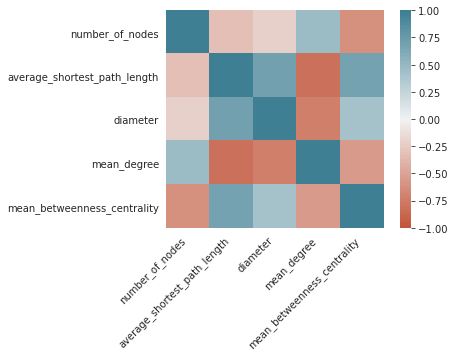

In [ ]:
corr = aux.iloc[:,:].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig('corr2.pdf')

## KNN

In [ ]:
#Aplicar KNN com validação cruzada

knn = KNeighborsClassifier()

# testar vários valores diferentes para k
param_grid = {'n_neighbors': np.arange(1, 25)}

#usar o grid search para testar o modelo com todos os valores de k - validação cruzada com 5 divisões
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

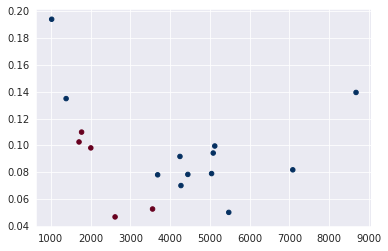

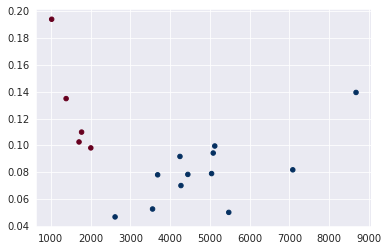

In [ ]:
y_test_pred = knn.predict(x_test)

plt.figure()
plt.scatter(x_test.iloc[:, 1], x_test.iloc[:, 2], c=y_test, s=20, cmap='RdBu')
plt.figure()
plt.scatter(x_test.iloc[:, 1], x_test.iloc[:, 2], c=y_test_pred, s=20, cmap='RdBu')

In [ ]:
#métricas de classificação

y_train_pred = knn.predict(x_train)


alvo = 1
avg = 'binary'
# avg = 'weighted'

print('Precisão de treinamento: '+ str(metrics.precision_score(y_train, y_train_pred, pos_label = alvo, average=avg)))
print('Precisão de teste: '+ str(metrics.precision_score(y_test, y_test_pred, pos_label = alvo, average=avg)))

print('Sensibilidade de treinamento: '+ str(metrics.recall_score(y_train, y_train_pred, pos_label = alvo, average=avg)))
print('Sensibilidade de teste: '+ str(metrics.recall_score(y_test, y_test_pred, pos_label = alvo, average=avg)))

Precisão de treinamento: 0.88
Precisão de teste: 0.8333333333333334
Sensibilidade de treinamento: 0.9166666666666666
Sensibilidade de teste: 0.8333333333333334


Text(0.5, 0, ' Fração de Falsos Positivos')

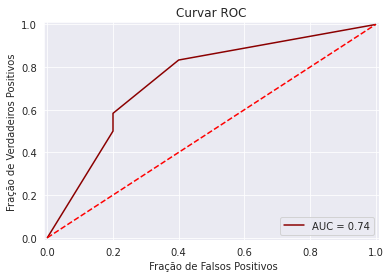

In [ ]:
#Podemos visualizar o balanço entre essas suas métricas com a curva ROC

y_test_pred_proba = knn.predict_proba(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred_proba[:,1])
auc = metrics.roc_auc_score(y_test, y_test_pred_proba[:,1]) #auc = area under curve

plt.plot(fpr, tpr, 'darkred', label = 'AUC = %0.2f' % auc)
plt.title('Curvar ROC')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #pior classificador possível
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('Fração de Verdadeiros Positivos') #igual ao recall
plt.xlabel(' Fração de Falsos Positivos') # FP/TN+FP

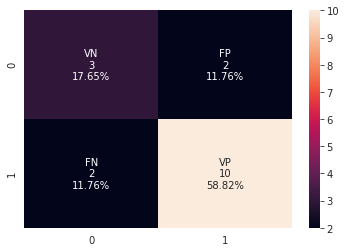

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test,y_test_pred)

group_names = ['VN','FP','FN','VP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)                    
sns.heatmap(cf_matrix, annot=labels, fmt='')